In [1]:

import wandb

wandb.init(project="house-price-regression", name="linear_reg")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nurch22 (nurch22-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [2]:
! pip install kaggle


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! mkdir ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download -c walmart-recruiting-store-sales-forecasting

  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 231MB/s]


In [8]:
! unzip walmart-recruiting-store-sales-forecasting

Archive:  walmart-recruiting-store-sales-forecasting.zip
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [9]:
!pip install autogluon.timeseries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.4/382.4 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.1/821.1 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [11]:
features = pd.read_csv("/content/features.csv.zip")
train = pd.read_csv("/content/train.csv.zip")
stores = pd.read_csv("/content/stores.csv")
test1 = pd.read_csv("/content/test.csv.zip")

# Data Cleaning

In [12]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [14]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [15]:
# Merge in one df:

df1 = train.merge(features, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
df = df1.merge(stores, on = ['Store'], how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [16]:
test1.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Train Data

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(421570, 16)

In [19]:
(df.isnull().sum()/len(df))*100

,0
Store,0.000000
Dept,0.000000
Date,0.000000
Weekly_Sales,0.000000
IsHoliday,0.000000
Temperature,0.000000
Fuel_Price,0.000000
MarkDown1,64.257181
MarkDown2,73.611025
MarkDown3,67.480845


In [20]:
# We will drop the Markdown columns as they have null values over 30%:

df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 32.6+ MB


In [22]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [23]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(keys = "Date", inplace = True)

In [25]:
df['Weekly_Sales'].dtype

dtype('float64')

In [26]:
df['IsHoliday'].value_counts()

,count
IsHoliday,
False,391909
True,29661


In [27]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


In [28]:
# Removing Outliers:

columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

Q3 = df[columns].quantile(.75)
Q1 = df[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 -  1.5*IQR

for column in columns:
    df[column] = np.where(df[column] > UL[column], UL[column], np.where(df[column] < LL[column], LL[column], df[column]))

In [29]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.091260,3.361027,171.201947,7.831783,136727.915739
std,12.785297,30.492054,22711.183519,18.444122,0.458515,39.159276,1.497917,60980.583328
min,1.000000,1.000000,-4988.940000,5.280000,2.472000,126.064000,4.369500,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,11.093500,219622.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   Type          421570 non-null  object 
 9   Size          421570 non-null  float64
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 32.6+ MB


In [31]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315.0
2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,151315.0
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,151315.0
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,151315.0
2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,151315.0


## Test Data

In [32]:
test1.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [33]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [34]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [35]:
df_test = test1.merge(features, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
test = df_test.merge(stores, on = ['Store'], how = 'inner')

In [36]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [37]:
test.drop(axis = 1, columns = ["MarkDown1", "MarkDown2","MarkDown3","MarkDown4", "MarkDown5"], inplace = True)

In [38]:
(test.isnull().sum()/len(test))*100

,0
Store,0.00000
Dept,0.00000
Date,0.00000
IsHoliday,0.00000
Temperature,0.00000
Fuel_Price,0.00000
CPI,33.16589
Unemployment,33.16589
Type,0.00000
Size,0.00000


In [39]:
# test.dropna(inplace = True)

In [40]:
# Filling null values with mean

test['CPI'] = test['CPI'].fillna(test['CPI'].mean())
test['Unemployment'] = test['Unemployment'].fillna(test['Unemployment'].mean())

In [41]:
# Removing outliers

columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

Q3 = test[columns].quantile(.75)
Q1 = test[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 -  1.5*IQR

for column in columns:
    test[column] = np.where(test[column] > UL[column], UL[column], np.where(test[column] < LL[column], LL[column], test[column]))

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   CPI           115064 non-null  float64
 7   Unemployment  115064 non-null  float64
 8   Type          115064 non-null  object 
 9   Size          115064 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 8.0+ MB


In [43]:
test['Date'] = pd.to_datetime(test['Date'])
test.set_index(keys = 'Date', inplace = True)
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [44]:
test.shape

(115064, 9)

In [45]:
test.duplicated().sum()

np.int64(0)

# Converting Categorical Data to Numerical

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['IsHoliday'] = encoder.fit_transform(df['IsHoliday'])
df['Type'] = encoder.fit_transform(df['Type'])
test['IsHoliday'] = encoder.fit_transform(test['IsHoliday'])

In [47]:
test['Type'] = encoder.fit_transform(test['Type'])

In [48]:
df.dtypes

,0
Store,int64
Dept,int64
Weekly_Sales,float64
IsHoliday,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64
Type,int64
Size,float64


In [49]:
test.dtypes

,0
Store,int64
Dept,int64
IsHoliday,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64
Type,int64
Size,float64


In [50]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-12,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315.0
2010-02-19,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315.0
2010-02-26,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315.0
2010-03-05,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315.0


In [51]:
df['CPI'] = df['CPI'].round(2)

In [52]:
test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,0,55.32,3.386,223.462779,6.573,0,151315.0
2012-11-09,1,1,0,61.24,3.314,223.481307,6.573,0,151315.0
2012-11-16,1,1,0,52.92,3.252,223.512911,6.573,0,151315.0
2012-11-23,1,1,1,56.23,3.211,223.561947,6.573,0,151315.0
2012-11-30,1,1,0,52.34,3.207,223.610984,6.573,0,151315.0


# Checking Multicollinearity

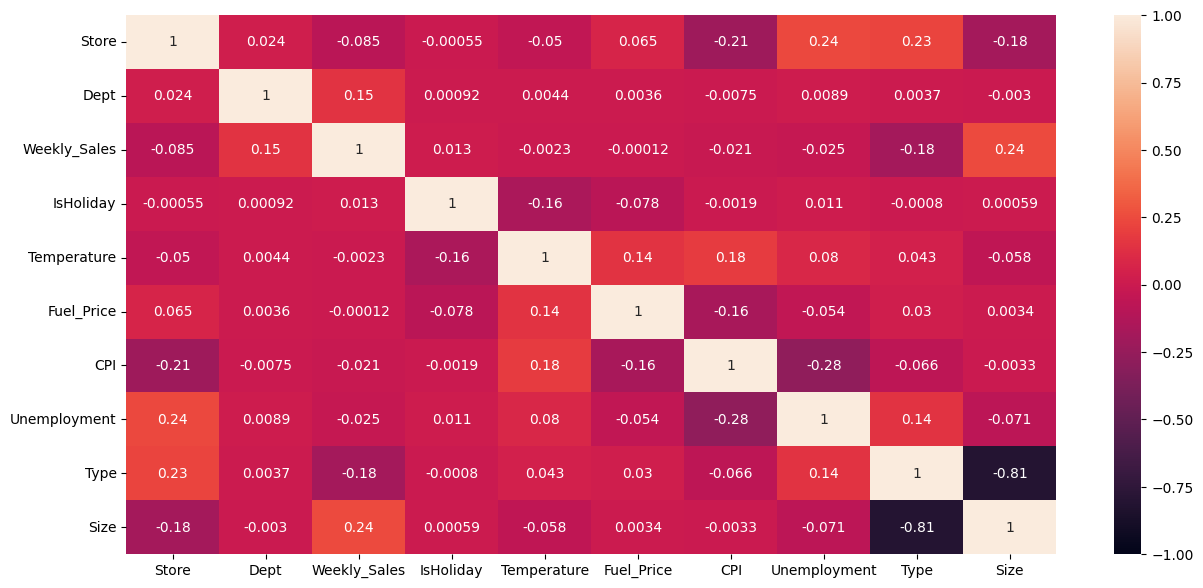

In [53]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

We can see multicollinearity exists between Type and Size as correlation is above 0.75. To decide which one to drop, we will call VIF.

# Removing Multicollinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Features'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data


,Features,VIF
0,Store,4.556908
1,Dept,3.151310
2,Weekly_Sales,1.635615
3,IsHoliday,1.102028
4,Temperature,13.114620
5,Fuel_Price,34.664951
6,CPI,15.993707
7,Unemployment,24.668334
8,Type,4.981511
9,Size,16.003423


In [55]:
# As Size has higher VIF between Type and Size, we will drop Size

df.drop(['Size'], axis = 1, inplace = True)

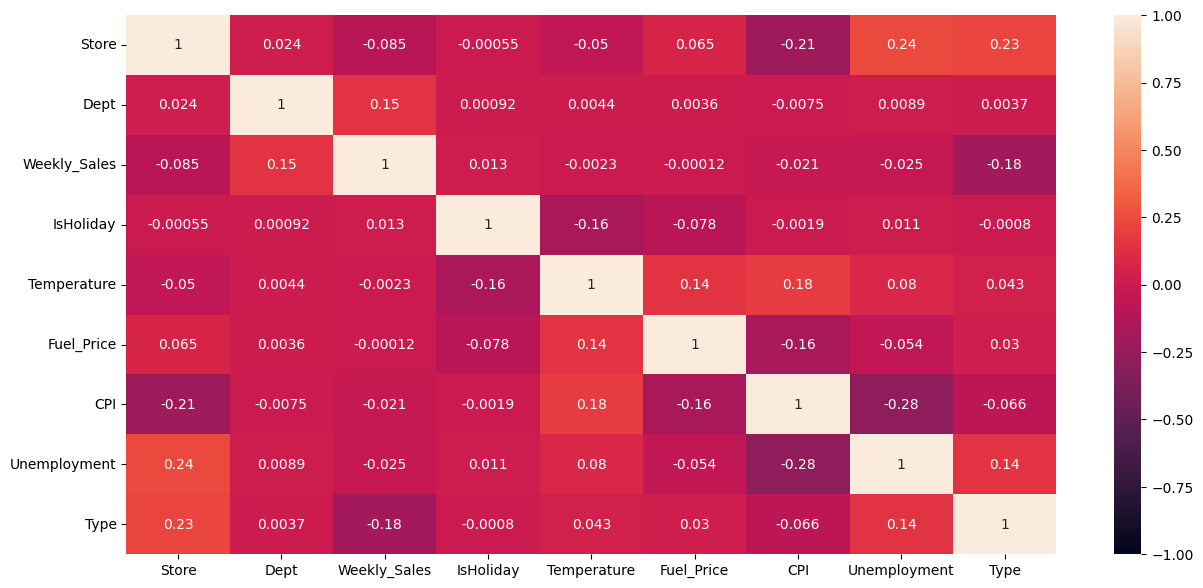

In [56]:
# Now we will call heatmapt again to see multicollinearity

plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

As we don't have correlation over .75, our data has reduced multicollinearity upto a significant extent and we can go ahead with further processing.

# Train Test Split

In [57]:
# df.reset_index(inplace = True)
# test.reset_index(inplace = True)

In [58]:
x = df.drop(['Weekly_Sales'], axis = 1)
y = df['Weekly_Sales']

In [59]:
x.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type'],
      dtype='object')

In [60]:
y.head()

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90


In [61]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [62]:
print("x Train Shape :",x_train.shape)
print("x Val Shape   :",x_val.shape)
print("y Train Shape :",y_train.shape)
print("y Val Shape   :",y_val.shape)

x Train Shape : (295099, 8)
x Val Shape   : (126471, 8)
y Train Shape : (295099,)
y Val Shape   : (126471,)


In [63]:
x.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type'],
      dtype='object')

### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)

In [65]:
lr.score(x_val, y_val)

0.05850943258780106

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def weighted_mean_absolute_error(y_true, y_pred, weights):
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

# Get the weights for WMAE (1 for non-holidays, 5 for holidays)
weights = x_val['IsHoliday'].apply(lambda x: 5 if x == 1 else 1)

wmae = weighted_mean_absolute_error(y_val, y_pred, weights)
r2 = r2_score(y_pred, y_val)

print('Weighted Mean Absolute Error = ', wmae)
print('R2 Score = ', r2)

Weighted Mean Absolute Error =  15086.420310684478
R2 Score =  -14.495163990651283


### Decision Tree Regression

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_val)

In [72]:
# Get the weights for WMAE (1 for non-holidays, 5 for holidays)
weights_dt = x_val['IsHoliday'].apply(lambda x: 5 if x == 1 else 1)

wmae_dt = weighted_mean_absolute_error(y_val, y_pred_dt, weights_dt)


print('Weighted Mean Absolute Error of DT = ', wmae_dt)

Weighted Mean Absolute Error of DT =  2938.37772444762


### Random Forest Regression

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_val)

In [75]:
# Get the weights for WMAE (1 for non-holidays, 5 for holidays)
weights_rf = x_val['IsHoliday'].apply(lambda x: 5 if x == 1 else 1)

wmae_rf = weighted_mean_absolute_error(y_val, y_pred_rf, weights_rf)

print('Weighted Mean Absolute Error of RF = ', wmae_rf)

Weighted Mean Absolute Error of RF =  2351.096103706966


In [76]:
import joblib
import wandb

# Save models
joblib.dump(lr, "final_lr.pkl")
joblib.dump(dt_model, "final_dt_model.pkl")
joblib.dump(rf_model, "final_rf_model.pkl")

# Log metrics to wandb
wandb.log({
    "linear_regression_wmae": wmae,
    "linear_regression_r2": r2,
    "decision_tree_wmae": wmae_dt,
    "random_forest_wmae": wmae_rf
})

# Log model files to wandb
wandb.save("final_lr.pkl")
wandb.save("final_dt_model.pkl")
wandb.save("final_rf_model.pkl")

wandb.finish()


decision_tree_rmse,▁
linear_regression_mse,▁
linear_regression_r2,▁
random_forest_rmse,▁
decision_tree_rmse,2938.37772
linear_regression_mse,15086.42031
linear_regression_r2,-14.49516
random_forest_rmse,2351.0961


Our best model is Random Forest Regressor where we have a R2 Scroe of 0.93. We will submit this.

# Submission

In [77]:
# Lets review test dataset
test.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')

In [78]:
test.dtypes

,0
Store,int64
Dept,int64
IsHoliday,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64
Type,int64
Size,float64


In [79]:
x.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type'],
      dtype='object')

In [80]:
test.drop(['Size'], axis = 1, inplace = True)

In [81]:
prediction = rf_model.predict(test)

In [82]:
submission = pd.read_csv("/content/sampleSubmission.csv.zip")

In [83]:
submission['Weekly_Sales'] = prediction

In [84]:
submission.to_csv('submission.csv', index=False)